In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split

1. Найти наилучший порог разбиения по первому признаку, при котором информационный выигрыш достигает наибольшего значения.

In [3]:
data_x = [(5.8, 2.7), (6.7, 3.1), (5.7, 2.9), (5.5, 2.4), (4.8, 3.4), (5.4, 3.4), (4.8, 3.0), (5.5, 2.5), (5.3, 3.7), (7.0, 3.2), (5.6, 2.9), (4.9, 3.1), (4.8, 3.0), (5.0, 2.3), (5.2, 3.4), (5.1, 3.8), (5.0, 3.0), (5.0, 3.3), (4.6, 3.1), (5.5, 2.6), (5.0, 3.5), (6.7, 3.0), (6.0, 2.2), (4.8, 3.1), (6.4, 2.9), (5.6, 3.0), (4.4, 3.0), (4.9, 2.4), (5.6, 3.0), (5.0, 3.6), (5.1, 3.3), (5.8, 4.0), (5.5, 2.4), (5.2, 2.7), (5.1, 3.8), (5.1, 3.5), (5.5, 4.2), (4.9, 3.1), (5.9, 3.2), (5.7, 2.6), (4.7, 3.2), (5.4, 3.9), (5.8, 2.6), (5.1, 3.4), (6.4, 3.2), (5.8, 2.7), (5.6, 2.7), (5.7, 2.8), (5.4, 3.0), (5.0, 3.2), (4.6, 3.4), (6.0, 2.7), (6.6, 3.0), (4.9, 3.0), (4.9, 3.6), (4.4, 3.2), (5.4, 3.4), (6.0, 3.4), (5.9, 3.0), (6.1, 2.8), (5.1, 3.7), (5.5, 3.5), (6.1, 3.0), (6.2, 2.2), (5.7, 3.0), (5.2, 3.5), (5.4, 3.7), (4.6, 3.2), (5.2, 4.1), (5.0, 2.0), (6.8, 2.8), (5.0, 3.5), (6.7, 3.1), (6.3, 3.3), (6.0, 2.9), (4.7, 3.2), (6.6, 2.9), (5.6, 2.5), (4.4, 2.9), (6.2, 2.9), (6.1, 2.9), (4.3, 3.0), (6.9, 3.1), (5.7, 3.8), (5.4, 3.9), (6.1, 2.8), (4.6, 3.6), (5.5, 2.3), (4.8, 3.4), (6.5, 2.8), (6.3, 2.5), (5.1, 3.8), (5.7, 4.4), (5.0, 3.4), (4.5, 2.3), (5.7, 2.8), (5.1, 2.5), (5.1, 3.5), (6.3, 2.3), (5.0, 3.4)]
data_y = [1, 1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1]

x_train = np.array(data_x)
y_train = np.array(data_y)
n = len(y_train)


p = lambda y, k: sum(y==k)/len(y)

S = lambda y: 1 - p(y, -1)**2 - p(y, 1)**2

_IG = lambda y, t: S(y) - S(y[x_train[:,0] < t]) * (len(y[x_train[:,0] < t])/n) - S(y[x_train[:,0] >= t]) * (len(y[x_train[:,0] >= t])/n)

range_t = np.arange(min(x_train[:, 0])+0.1, max(x_train[:, 0])-0.1, 0.1)

t0 = range_t[np.argmax(np.array([_IG(y_train, t) for t in range_t]))]
IG = _IG(y_train, t0)

### $IG = S_{0} - \sum \frac{N_{i}}{N}S_{i}$

### $S_{i} = 1 - \sum p_{k}^2$

### $p_{k} = \frac{\sum y_{k}}{\sum y}$

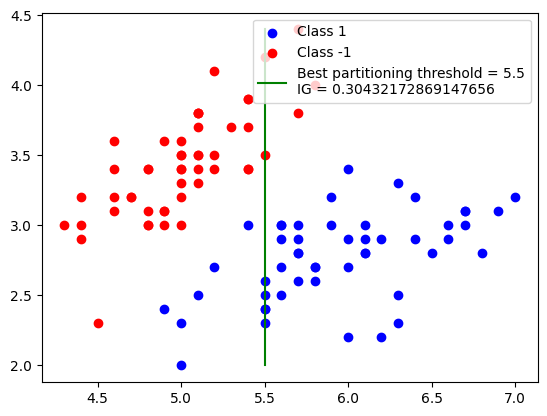

In [22]:
x1 = x_train[y_train == 1]
x_1 = x_train[y_train == -1]

plt.scatter(x1[:, 0], x1[:, 1], color='blue', label='Class 1')
plt.scatter(x_1[:, 0], x_1[:, 1], color='red', label='Class -1')

x_min, x_max = np.min(x_train[:, 1]), np.max(x_train[:, 1])
x_range = np.array([t0 for _ in range(10)])
y_range = np.linspace(x_min, x_max, 10)

plt.plot(x_range, y_range, color='green', label=f'Best partitioning threshold = {np.around(t0, 2)}\nIG = {IG}')
plt.legend()

plt.show()

2. Аппроксимировать функцию с помощью решающего дерева.

In [48]:
x = np.arange(-2, 3, 0.1).reshape(-1, 1)
y = 0.3 * x ** 2 - 0.2 * x ** 3 - 0.5 * np.sin(4*x)

clf = tree.DecisionTreeRegressor(max_depth=4)

clf.fit(x, y)

pr_y = clf.predict(x)

Q = ((pr_y - y.reshape(50,))**2).mean()

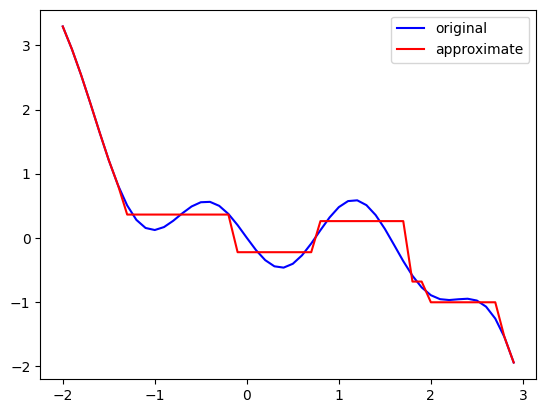

In [49]:
plt.plot(x, y, label='original', color='blue')
plt.plot(x, pr_y, label='approximate', color='red')

plt.legend()
plt.show()

3. Построение решающего дерева для задачи классификации.

In [78]:
X = np.array([(300, 200), (320, 180), (400, 100), (430, 65), (64, 150), (84, 112), (106, 90), (154, 64), (192, 62), (220, 82), (244, 92), (271, 111), (275, 137), (286, 161), (56, 178), (80, 156), (101, 131), (123, 104), (155, 94), (191, 100), (242, 70), (231, 114), (272, 95), (261, 131), (299, 136), (308, 124), (128, 78), (47, 128), (47, 159), (137, 186), (166, 228), (171, 250), (194, 272), (221, 287), (253, 292), (308, 293), (332, 280), (385, 256), (398, 237), (413, 205), (435, 166), (447, 137), (422, 126), (400, 154), (389, 183), (374, 214), (358, 235), (321, 250), (274, 263), (249, 263), (208, 230), (192, 204), (182, 174), (147, 205), (136, 246), (147, 255), (182, 282), (204, 298), (252, 316), (312, 321), (349, 313), (393, 288), (417, 259), (434, 222), (443, 187), (463, 174), (420, 90)])
Y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

clf_tree = tree.DecisionTreeClassifier(criterion='gini', max_depth=4)

clf_tree.fit(X, Y)
predict = clf_tree.predict(X)

Q = (predict == Y).mean()

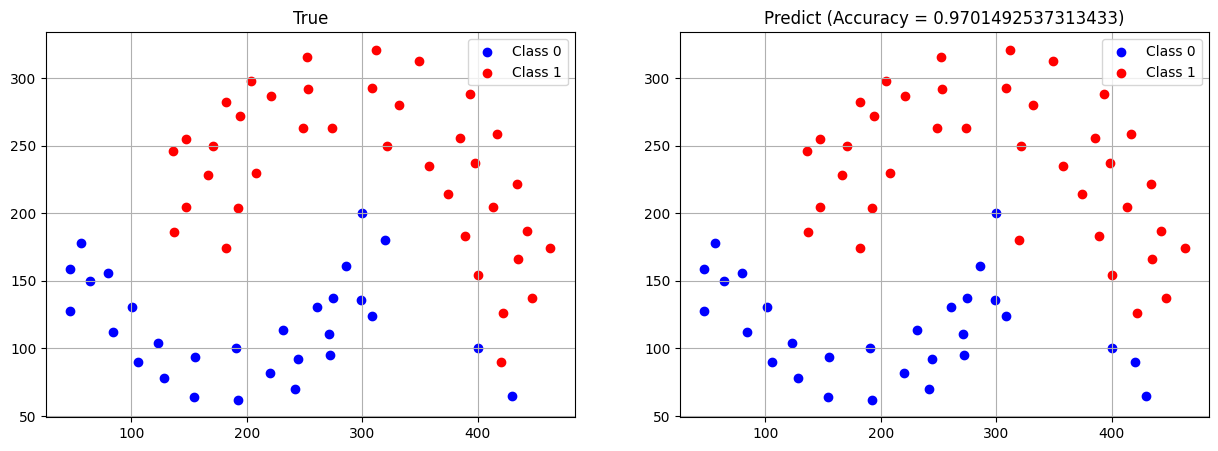

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].grid()
ax[1].grid()

x_0 = X[Y == 0]
x_1 = X[Y == 1]

ax[0].scatter(x_0[:, 0], x_0[:, 1], color='blue', label='Class 0')
ax[0].scatter(x_1[:, 0], x_1[:, 1], color='red', label='Class 1')
ax[0].set_title('True')
ax[0].legend()

x_0_pr = X[predict == 0]
x_1_pr = X[predict == 1]

ax[1].scatter(x_0_pr[:, 0], x_0_pr[:, 1], color='blue', label='Class 0')
ax[1].scatter(x_1_pr[:, 0], x_1_pr[:, 1], color='red', label='Class 1')
ax[1].set_title(f'Predict (Accuracy = {Q})')
ax[1].legend()

plt.show()

4. Аппроксимировать функцию с помощью ансамбля решающих деревьев.

In [63]:
x = np.arange(-3, 3, 0.1)
y = 0.3 * x + np.cos(2*x) + 0.2 * np.sin(7*x) # + np.random.normal(0.0, 0.1, n_samples)
x = x.reshape(-1, 1)

T = 10  # число деревьев

rf = RandomForestRegressor(max_depth=5, n_estimators=T, random_state=1)

rf.fit(x, y)
pr_y = rf.predict(x)

Q = ((pr_y - y)**2).mean()

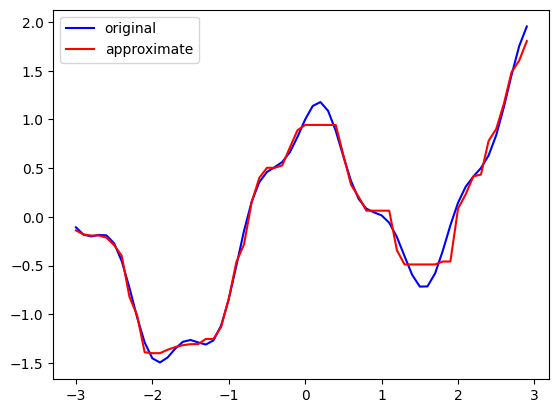

In [64]:
plt.plot(x, y, label='original', color='blue')
plt.plot(x, pr_y, label='approximate', color='red')

plt.legend()
plt.show()

5. Выполнить обучение алгоритма random forest для задачи классификации.

In [96]:
np.random.seed(0)
n_feature = 5

# исходные параметры для формирования образов обучающей выборки
r1 = 0.7
D1 = 3.0
mean1 = [3, 7, -2, 4, 6]
V1 = [[D1 * r1 ** abs(i-j) for j in range(n_feature)] for i in range(n_feature)]

r2 = 0.5
D2 = 2.0
mean2 = [3, 7, -2, 4, 6] + np.array(range(1, n_feature+1)) * 0.5
V2 = [[D2 * r2 ** abs(i-j) for j in range(n_feature)] for i in range(n_feature)]

r3 = -0.7
D3 = 1.0
mean3 = [3, 7, -2, 4, 6] + np.array(range(1, n_feature+1)) * -0.5
V3 = [[D3 * r3 ** abs(i-j) for j in range(n_feature)] for i in range(n_feature)]

# моделирование обучающей выборки
N1, N2, N3 = 1000, 1200, 900
x1 = np.random.multivariate_normal(mean1, V1, N1).T
x2 = np.random.multivariate_normal(mean2, V2, N2).T
x3 = np.random.multivariate_normal(mean3, V3, N3).T

data_x = np.hstack([x1, x2, x3]).T
data_y = np.hstack([np.zeros(N1), np.ones(N2), np.ones(N3) * 2])

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=123,test_size=0.3, shuffle=True)

clf = RandomForestClassifier(max_depth=8, n_estimators=10)

clf.fit(x_train, y_train)

predict = clf.predict(x_test)

Q = (predict==y_test).mean()

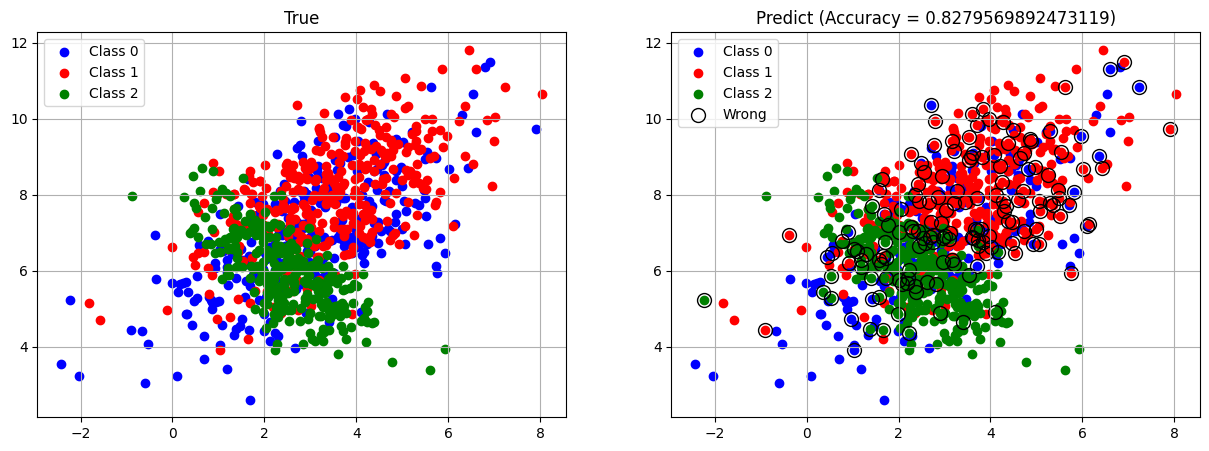

In [97]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].grid()
ax[1].grid()

x_0 = x_test[y_test == 0]
x_1 = x_test[y_test == 1]
x_2 = x_test[y_test == 2]


ax[0].scatter(x_0[:, 0], x_0[:, 1], color='blue', label='Class 0')
ax[0].scatter(x_1[:, 0], x_1[:, 1], color='red', label='Class 1')
ax[0].scatter(x_2[:, 0], x_2[:, 1], color='green', label='Class 2')

ax[0].set_title('True')
ax[0].legend()

x_0_pr = x_test[predict == 0]
x_1_pr = x_test[predict == 1]
x_2_pr = x_test[predict == 2]
x_wrong = x_test[predict != y_test]


ax[1].scatter(x_0_pr[:, 0], x_0_pr[:, 1], color='blue', label='Class 0')
ax[1].scatter(x_1_pr[:, 0], x_1_pr[:, 1], color='red', label='Class 1')
ax[1].scatter(x_2_pr[:, 0], x_2_pr[:, 1], color='green', label='Class 2')
ax[1].scatter(x_wrong[:, 0], x_wrong[:, 1], color='#ffffff00', label='Wrong', edgecolors='black', s=100)


ax[1].set_title(f'Predict (Accuracy = {Q})')
ax[1].legend()

plt.show()

6. С помощью алгоритма AdaBoost создать композицию из решающих деревьев для задачи классификации.

In [98]:
np.random.seed(0)
n_feature = 2

# исходные параметры для формирования образов обучающей выборки
r1 = 0.7
D1 = 3.0
mean1 = [3, 7]
V1 = [[D1 * r1 ** abs(i-j) for j in range(n_feature)] for i in range(n_feature)]

r2 = 0.5
D2 = 2.0
mean2 = [4, 2]
V2 = [[D2 * r2 ** abs(i-j) for j in range(n_feature)] for i in range(n_feature)]

# моделирование обучающей выборки
N1, N2 = 1000, 1200
x1 = np.random.multivariate_normal(mean1, V1, N1).T
x2 = np.random.multivariate_normal(mean2, V2, N2).T

data_x = np.hstack([x1, x2]).T
data_y = np.hstack([np.ones(N1) * -1, np.ones(N2)])

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=123,test_size=0.3, shuffle=True)

w = np.ones(len(x_train)) / len(x_train)
max_depth = 3
T = 10

alg = []
alpha = []

for t in range(T):
    b_t = DecisionTreeClassifier(criterion='gini', max_depth=max_depth)
    b_t.fit(x_train, y_train, sample_weight=w)
    alg.append(b_t)
    
    pr = b_t.predict(x_train)
    
    N = sum((pr != y_train) * w)
    alpha.append(0.5 * np.log((1-N)/N))
    
    w = w * np.exp(-1 * alpha[t] * y_train * pr)
    w = w/sum(w)
    
predict = np.array([a * b.predict(x_test) for a, b in zip(alpha, alg)])

predict = np.sign(sum(predict))
Q = sum(predict != y_test)

Основная идея бустинга алгоритмов состоит в последовательном обучении T моделей преимущественно на образах, которые были плохо обработаны предыдущими моделями.

В алгоритме AdaBoost используется экспоненциальная функция потерь: 
### $L(w)=exp(−M)$

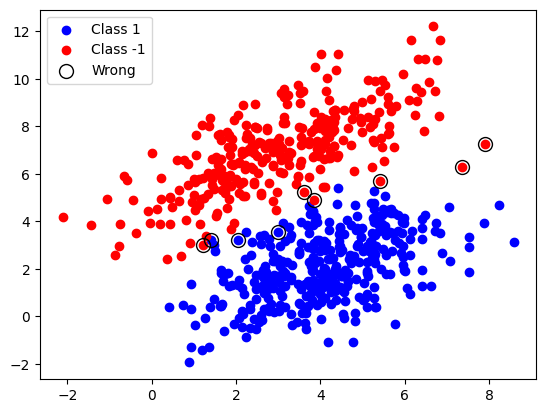

In [100]:
x1 = x_test[predict == 1]
x_1 = x_test[predict == -1]
x_wrong = x_test[y_test != predict]

plt.scatter(x1[:, 0], x1[:, 1], c='blue', label='Class 1')
plt.scatter(x_1[:, 0], x_1[:, 1], c='red', label='Class -1')
plt.scatter(x_wrong[:, 0], x_wrong[:, 1], c='#ffffff00', label='Wrong', edgecolors='black', s=100)

plt.legend()
plt.show()

7. Алгоритм AdaBoost в задаче регрессии. Аппроксимация функции.

In [102]:
x = np.arange(-3, 3, 0.1).reshape(-1, 1)
y = 2 * np.cos(x) + 0.5 * np.sin(2*x) - 0.2 * np.sin(4*x)

max_depth=3
T=6

s = np.array(y.ravel())
alg = []

for t in range(T):
    b_t = tree.DecisionTreeRegressor(max_depth=max_depth)
    b_t.fit(x, s)
    
    alg.append(b_t)
    
    s = s - b_t.predict(x)
    
predict = sum(np.array([b.predict(x) for b in alg]))

QT = ((y.ravel() - predict)**2).mean()

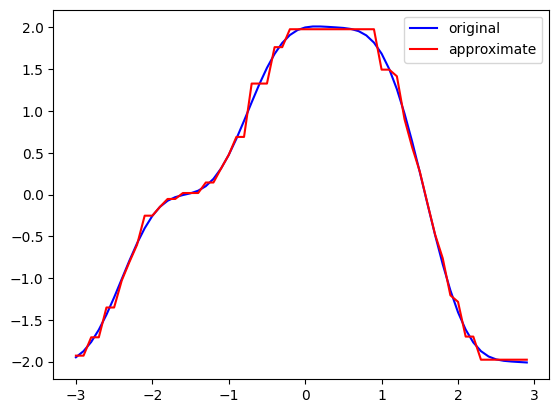

In [103]:
plt.plot(x, y, label='original', color='blue')
plt.plot(x, predict, label='approximate', color='red')

plt.legend()
plt.show()